In [9]:
from sklearn.cluster import SpectralClustering
import numpy as np
X = np.array([[4, 7, 5, 6], [4, 7, 5, 6], [1, 0, 4, 6],
              [4, 7, 5, 23], [3, 5, 6, 6], [3, 6, 7, 25]])
clustering = SpectralClustering(n_clusters=2,
        assign_labels='discretize',
        random_state=0).fit_predict(X)

In [2]:
clustering

array([0, 0, 0, 1, 0, 1], dtype=int64)

### With Hypervectors?

In [1]:
from Research_Final.DatasetLoader_mine2 import DatasetLoader
import os
import numpy as np

In [2]:
parent = 'multipletimeseriesforecasting/preprocessed-data/'

path = os.path.join(parent, 'SanFranciscoTraffic/traffic_weekly_dataset.tsf')

dl = DatasetLoader('SanFranciscoTraffic', path)

matrix_1_original = dl.dataset_load_and_preprocess("original")
matrix_1_norm = dl.dataset_load_and_preprocess("normalized")
print(matrix_1_norm.shape)

---------------------------------------------------
Dataset name:  SanFranciscoTraffic
Dataset contains missing values?  False
--------------------------
---------------------------------------------------
Dataset name:  SanFranciscoTraffic
Dataset contains missing values?  False
--------------------------
(862, 104)


In [3]:
sample_len = int(matrix_1_norm.shape[1]*(0.15))
print("Sample_len total", sample_len)

np.random.seed(1)
sets = np.random.choice(matrix_1_norm.shape[1]-40, int(sample_len), replace=False)
sets_training, sets_testing = sets[:int(len(sets)*.8)], sets[int(len(sets)*.8):]
print(sets_training, sets_testing)

Sample_len total 15
[24 39 52 27 44  2 21 62 41 50 38 54] [35 26 57]


In [5]:
from torchhd import embeddings
from torchhd import functional
import math
import torch
import torch.nn as nn

project = embeddings.Projection(40, 10000).double() # 5 features, 10000 dimensions = hypervectors like weights?
project.weight.data.normal_(0, 1) # Normal distributions mean=0.0, std=1.0
bias = nn.parameter.Parameter(torch.empty(10000), requires_grad=False)
bias.data.uniform_(0, 2 * math.pi) # bias

def encode(x): # encoding a value
    for i in range(len(x)):
        x[i] = float(x[i])
    enc = project(x)
    sample_hv = torch.cos(enc + bias) * torch.sin(enc) 
    return functional.hard_quantize(sample_hv)

In [6]:
full_samples = []
for i in sets_training:
    samples = matrix_1_norm[:, i:i+40]
    for n in range(0, samples.shape[0], 2):
        sample = torch.tensor(samples[n, :])
        full_samples.append(sample)

len(full_samples)

5172

In [7]:
encoded = [encode(samp).numpy() for samp in full_samples]

In [7]:
encoded

[array([-1.,  1., -1., ...,  1., -1.,  1.]),
 array([-1., -1.,  1., ..., -1., -1.,  1.]),
 array([-1.,  1., -1., ..., -1., -1., -1.]),
 array([-1., -1., -1., ..., -1., -1.,  1.]),
 array([-1.,  1., -1., ..., -1., -1.,  1.]),
 array([-1.,  1., -1., ..., -1., -1.,  1.]),
 array([-1., -1.,  1., ..., -1., -1., -1.]),
 array([ 1.,  1., -1., ..., -1., -1.,  1.]),
 array([-1.,  1., -1., ..., -1., -1.,  1.]),
 array([-1.,  1., -1., ..., -1., -1.,  1.]),
 array([-1.,  1., -1., ..., -1., -1.,  1.]),
 array([-1.,  1., -1., ..., -1., -1.,  1.]),
 array([-1., -1., -1., ..., -1., -1., -1.]),
 array([-1.,  1., -1., ..., -1., -1.,  1.]),
 array([-1.,  1., -1., ..., -1., -1., -1.]),
 array([-1.,  1., -1., ..., -1., -1.,  1.]),
 array([-1.,  1., -1., ..., -1., -1.,  1.]),
 array([-1.,  1., -1., ..., -1., -1., -1.]),
 array([-1.,  1., -1., ...,  1., -1.,  1.]),
 array([-1.,  1.,  1., ..., -1., -1.,  1.]),
 array([-1.,  1.,  1., ..., -1., -1.,  1.]),
 array([-1.,  1., -1., ..., -1., -1.,  1.]),
 array([ 1

In [10]:
encoded[0].numpy()


AttributeError: 'numpy.ndarray' object has no attribute 'numpy'

In [10]:
clustering = SpectralClustering(n_clusters=4,
        assign_labels='kmeans',
        random_state=0).fit_predict(encoded)

d:\Aplicaciones\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


KeyboardInterrupt: 

In [25]:
np.count_nonzero(clustering)

6

In [14]:
from sklearn.decomposition import PCA
pca_clusters = PCA(n_components=2).fit(encoded).transform(encoded)

#### This one is with assign_labels = discretize

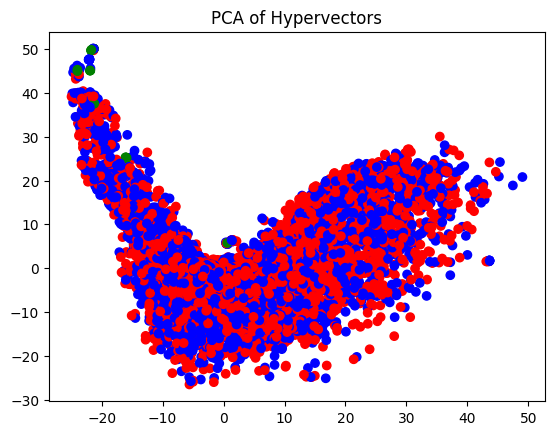

In [21]:
import matplotlib.pyplot as plt

### Like 7000 where nonzero here :o

pca_cl_x = [hv[0] for hv in pca_clusters]
pca_cl_y = [hv[1] for hv in pca_clusters]

plt.title("PCA of Hypervectors")
#plt.plot(pca_cl_x, pca_cl_y, "ro")
colors = ["red", "green", "blue", "black"]
color = [colors[c] for c in clustering]
plt.scatter(pca_cl_x, pca_cl_y, color=color)
plt.show()

#### This one is with assign_labels = kmeans

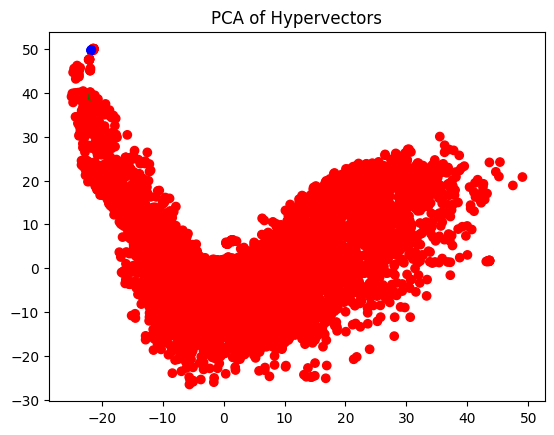

In [24]:
import matplotlib.pyplot as plt

# Only 6 are not red :(

pca_cl_x = [hv[0] for hv in pca_clusters]
pca_cl_y = [hv[1] for hv in pca_clusters]

plt.title("PCA of Hypervectors")
#plt.plot(pca_cl_x, pca_cl_y, "ro")
colors = ["red", "green", "blue", "black"]
color = [colors[c] for c in clustering]
plt.scatter(pca_cl_x, pca_cl_y, color=color)
plt.show()

In [27]:
clustering = SpectralClustering(n_clusters=4,
        assign_labels='discretize',
        random_state=0).fit(encoded)

d:\Aplicaciones\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [29]:
clustering.labels_

array([1, 2, 0, ..., 0, 2, 2], dtype=int64)

#### Try actual k-means

In [11]:
from sklearn.cluster import KMeans

In [12]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10).fit(encoded)

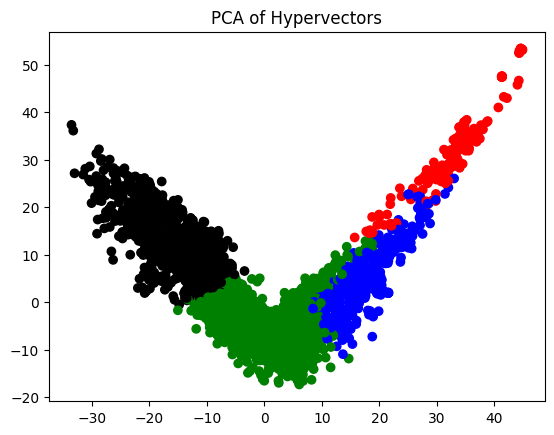

In [15]:
import matplotlib.pyplot as plt

# Only 6 are not red :(

pca_cl_x = [hv[0] for hv in pca_clusters]
pca_cl_y = [hv[1] for hv in pca_clusters]

plt.title("PCA of Hypervectors")
#plt.plot(pca_cl_x, pca_cl_y, "ro")
colors = ["red", "green", "blue", "black"]
color = [colors[c] for c in kmeans.labels_]
plt.scatter(pca_cl_x, pca_cl_y, color=color)
plt.show()

#### Continue with spectral clustering but using precomputed affinity matrix

In [42]:
encoded = np.zeros((len(full_samples), 10000))
encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
for i, samp in enumerate(full_samples):
    hd = encode(samp)
    encoded[i, :] = hd.numpy()

In [44]:
import torch

encoded = torch.from_numpy(encoded)

In [45]:
from torchhd import cos_similarity

affinity_matrix = cos_similarity(encoded, encoded)

In [46]:
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=4,
        assign_labels='discretize',
        random_state=0, affinity='precomputed').fit(affinity_matrix)

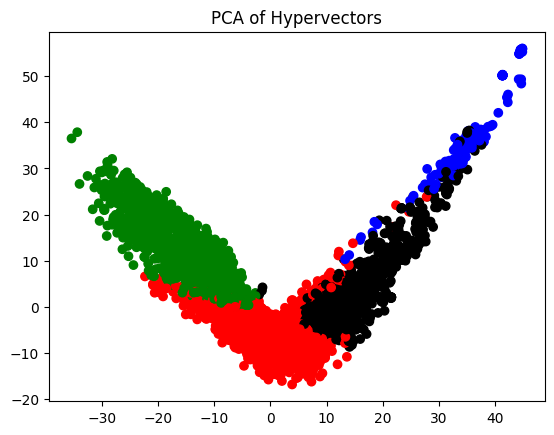

In [50]:
import matplotlib.pyplot as plt

pca_cl_x = [hv[0] for hv in pca_clusters]
pca_cl_y = [hv[1] for hv in pca_clusters]

plt.title("PCA of Hypervectors")
#plt.plot(pca_cl_x, pca_cl_y, "ro")
colors = ["red", "green", "blue", "black"]
color = [colors[c] for c in clustering.labels_]
plt.scatter(pca_cl_x, pca_cl_y, color=color)
plt.show()

### Let's run the tests :)

#### Kmeans

In [96]:
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data

# Note: this example requires the torchmetrics library: https://torchmetrics.readthedocs.io
import torchmetrics
from tqdm import tqdm

from torchhd import functional
from torchhd import embeddings
from torchhd import cos_similarity

from scipy.special import softmax

import time
from sklearn.cluster import KMeans

d = 10000
models = 10

# Model based on RegHD application for Single model regression -> No comparing which cluster
class MultiModel_With_NonLinear_Sin(nn.Module):
    def __init__(self, num_classes, size):
        super(MultiModel_With_NonLinear_Sin, self).__init__()

        self.lr = 0.00001 # alpha
        self.M = torch.zeros(models, d).double() # Model initializes in 0
        self.project = embeddings.Projection(size, d).double() # 5 features, 10000 dimensions = hypervectors like weights?
        self.project.weight.data.normal_(0, 1) # Normal distributions mean=0.0, std=1.0
        self.bias = nn.parameter.Parameter(torch.empty(d), requires_grad=False)
        self.bias.data.uniform_(0, 2 * math.pi) # bias
        self.cluster_model = None

    def encode(self, x): # encoding a value
        for i in range(len(x)):
            x[i] = float(x[i])
        enc = self.project(x)
        sample_hv = torch.cos(enc + self.bias) * torch.sin(enc) 
        return functional.hard_quantize(sample_hv)

    def model_update(self, x, y, cluster): # update # y = no hv
        x = torch.reshape(x, (1,d))
        #confidence = np.transpose(softmax(cos_similarity(self.cluster, x))) # Compare input with cluster
        model_result = F.linear(x, self.M[cluster]).type(torch.FloatTensor)
        update = self.M[cluster] + (self.lr * (y - model_result) * x) # Model + alpha*(Error)*(x)
        self.M[cluster] = update[0] # New 
        #center = [num.item() for num in confidence[0]].index(max(confidence[0]).item())
        #self.cluster[center] = self.cluster[center] + (1-max(confidence[0])) * x
        #return center
    
    def forward(self, x):
        enc = torch.reshape(self.encode(x), (1,d))
        #confidence = np.transpose(softmax(cos_similarity(self.cluster, enc))) # Compare input with cluster
        model_result = F.linear(enc, self.M[self.cluster_model.predict(enc)])
        #res = F.linear(confidence, model_result) # Multiply enc (x) * weights (Model) = Dot product
        return model_result # Return the resolutions
    
    def train(self, sets_training, matrix_1_norm, epochs):
        
        full_samples = []
        for i in sets_training:
            samples = matrix_1_norm[:, i:i+40]
            for n in range(samples.shape[0]):
                sample = torch.tensor(samples[n, :])
                full_samples.append(sample)
        
        encoded = [self.encode(samp).numpy() for samp in full_samples]
        print(len(encoded))
        if(self.cluster_model == None):
            kmeans = KMeans(n_clusters=models, random_state=0, n_init=10).fit(encoded)
            self.cluster_model = kmeans

        for _ in tqdm(range(epochs)): # Number of iterations for all the samples
            mse = torchmetrics.MeanSquaredError()
            for time, i in enumerate(sets_training):
                pred = []
                #samples = matrix_1_norm[:, i:i+40]
                labels = matrix_1_norm[:, i+40]
                
                for n in range(samples.shape[0]):
                    label = torch.tensor(labels[n])
                    #sample = torch.tensor(samples[n, :])
                    #samples_hv = model.encode(sample) # Encode the inputs
                    item = (samples.shape[0]*time) + n
                    self.model_update(torch.tensor(encoded[item]), label, self.cluster_model.labels_[item]) # Pass input and label to train
                    predictions_testing = self(full_samples[item]) # Pass samples from test to model (forward function)
                    pred.append(predictions_testing[0])
                    mse.update(predictions_testing[0], label.unsqueeze(dim=0))

            print(f"Training mean squared error of {(mse.compute().item()):.3f}")
    
    def test(self, sets_testing, matrix_1_norm):
        mse = torchmetrics.MeanSquaredError()
        for i in tqdm(sets_testing):
            pred = []
            samples = matrix_1_norm[:, i:i+40]
            labels = matrix_1_norm[:, i+40]
            for n in range(samples.shape[0]):
                label = torch.tensor(labels[n])
                sample = torch.tensor(samples[n, :])
                # Pass samples from test to model (forward function)
                predictions = model(sample)
                pred.append(predictions[0])
                mse.update(predictions[0], label.unsqueeze(dim=0))
                # dif_hd.append(np.absolute(label-predictions))

        print(
            f"Testing mean squared error of testing {(mse.compute().item()):.3f}")
  
model = MultiModel_With_NonLinear_Sin(2, 40) # 1 class, 5

In [105]:
model.train(sets_training, matrix_1_norm, 1)

10344


100%|██████████| 1/1 [00:58<00:00, 58.28s/it]

Training mean squared error of 0.011


In [106]:
model.test(sets_testing, matrix_1_norm)

100%|██████████| 3/3 [00:12<00:00,  4.22s/it]

Testing mean squared error of testing 0.028


#### Spectral Clustering

In [109]:
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data

# Note: this example requires the torchmetrics library: https://torchmetrics.readthedocs.io
import torchmetrics
from tqdm import tqdm

from torchhd import functional
from torchhd import embeddings
from torchhd import cos_similarity

from scipy.special import softmax

import time
from sklearn.cluster import SpectralClustering

d = 10000
models = 10

# Model based on RegHD application for Single model regression -> No comparing which cluster
class MultiModel_With_NonLinear_Sin(nn.Module):
    def __init__(self, num_classes, size):
        super(MultiModel_With_NonLinear_Sin, self).__init__()

        self.lr = 0.00001 # alpha
        self.M = torch.zeros(models, d).double() # Model initializes in 0
        self.project = embeddings.Projection(size, d).double() # 5 features, 10000 dimensions = hypervectors like weights?
        self.project.weight.data.normal_(0, 1) # Normal distributions mean=0.0, std=1.0
        self.bias = nn.parameter.Parameter(torch.empty(d), requires_grad=False)
        self.bias.data.uniform_(0, 2 * math.pi) # bias
        self.cluster_model = None

    def encode(self, x): # encoding a value
        for i in range(len(x)):
            x[i] = float(x[i])
        enc = self.project(x)
        sample_hv = torch.cos(enc + self.bias) * torch.sin(enc) 
        return functional.hard_quantize(sample_hv)

    def model_update(self, x, y, cluster): # update # y = no hv
        x = torch.reshape(x, (1,d))
        model_result = F.linear(x, self.M[cluster]).type(torch.FloatTensor)
        update = self.M[cluster] + (self.lr * (y - model_result) * x) # Model + alpha*(Error)*(x)
        self.M[cluster] = update[0] # New 
    
    def forward(self, x):
        enc = torch.reshape(self.encode(x), (1,d))
        #confidence = np.transpose(softmax(cos_similarity(self.cluster, enc))) # Compare input with cluster
        model_result = F.linear(enc, self.M[self.cluster_model.predict(enc)])
        #res = F.linear(confidence, model_result) # Multiply enc (x) * weights (Model) = Dot product
        return model_result # Return the resolutions
    
    def train(self, sets_training, matrix_1_norm, epochs):
        
        full_samples = []
        for i in sets_training:
            samples = matrix_1_norm[:, i:i+40]
            for n in range(samples.shape[0]):
                sample = torch.tensor(samples[n, :])
                full_samples.append(sample)
        
        encoded = np.zeros((len(full_samples), 10000))
        for i, samp in enumerate(full_samples):
            hd = self.encode(samp)
            encoded[i, :] = hd.numpy()
        encoded = torch.from_numpy(encoded)

        if(self.cluster_model == None):
            affinity_matrix = cos_similarity(encoded, encoded)
            clustering = SpectralClustering(n_clusters=4, 
                                        assign_labels='discretize', 
                                        random_state=0, 
                                        affinity='precomputed').fit(affinity_matrix)
            self.cluster_model = clustering

        for _ in tqdm(range(epochs)): # Number of iterations for all the samples
            mse = torchmetrics.MeanSquaredError()
            for time, i in enumerate(sets_training):
                pred = []
                #samples = matrix_1_norm[:, i:i+40]
                labels = matrix_1_norm[:, i+40]
                
                for n in range(samples.shape[0]):
                    label = torch.tensor(labels[n])
                    #sample = torch.tensor(samples[n, :])
                    #samples_hv = model.encode(sample) # Encode the inputs
                    item = (samples.shape[0]*time) + n
                    self.model_update(torch.tensor(encoded[item]), label, self.cluster_model.labels_[item]) # Pass input and label to train
                    predictions_testing = self(full_samples[item]) # Pass samples from test to model (forward function)
                    pred.append(predictions_testing[0])
                    mse.update(predictions_testing[0], label.unsqueeze(dim=0))

            print(f"Training mean squared error of {(mse.compute().item()):.3f}")
    
    def test(self, sets_testing, matrix_1_norm):
        mse = torchmetrics.MeanSquaredError()
        for i in tqdm(sets_testing):
            pred = []
            samples = matrix_1_norm[:, i:i+40]
            labels = matrix_1_norm[:, i+40]
            for n in range(samples.shape[0]):
                label = torch.tensor(labels[n])
                sample = torch.tensor(samples[n, :])
                # Pass samples from test to model (forward function)
                predictions = model(sample)
                pred.append(predictions[0])
                mse.update(predictions[0], label.unsqueeze(dim=0))
                # dif_hd.append(np.absolute(label-predictions))

        print(
            f"Testing mean squared error of testing {(mse.compute().item()):.3f}")
  
model = MultiModel_With_NonLinear_Sin(2, 40) # 1 class, 5

In [110]:
model.train(sets_training, matrix_1_norm, 1)

  0%|          | 0/1 [00:00<?, ?it/s]C:\Users\ivann\AppData\Local\Temp\ipykernel_3632\3868205130.py:95: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.model_update(torch.tensor(encoded[item]), label, self.cluster_model.labels_[item]) # Pass input and label to train
  0%|          | 0/1 [00:01<?, ?it/s]


AttributeError: 'SpectralClustering' object has no attribute 'predict'

#### Normal RegHD - RMSE

In [113]:
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data

# Note: this example requires the torchmetrics library: https://torchmetrics.readthedocs.io
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

from torchhd import functional
from torchhd import embeddings
from torchhd import cos_similarity

from scipy.special import softmax

import time

d = 10000
models = 8

# Model based on RegHD application for Single model regression -> No comparing which cluster
class MultiModel_With_NonLinear_Sin(nn.Module):
    def __init__(self, num_classes, size):
        super(MultiModel_With_NonLinear_Sin, self).__init__()

        self.lr = 0.00001 # alpha
        self.M = torch.zeros(models, d).double() # Model initializes in 0
        self.project = embeddings.Projection(size, d).double() # 5 features, 10000 dimensions = hypervectors like weights?
        self.project.weight.data.normal_(0, 1) # Normal distributions mean=0.0, std=1.0
        self.bias = nn.parameter.Parameter(torch.empty(d), requires_grad=False)
        self.bias.data.uniform_(0, 2 * math.pi) # bias
        self.cluster = functional.random_hv(models, d)

    def encode(self, x): # encoding a value
        for i in range(len(x)):
            x[i] = float(x[i])
        enc = self.project(x)
        sample_hv = torch.cos(enc + self.bias) * torch.sin(enc) 
        return functional.hard_quantize(sample_hv)

    def model_update(self, x, y): # update # y = no hv
        x = torch.reshape(x, (1,d))
        confidence = np.transpose(softmax(cos_similarity(self.cluster, x))) # Compare input with cluster
        model_result = F.linear(x, self.M).type(torch.FloatTensor)
        update = self.M + (float(self.lr) * float(y - F.linear(confidence, model_result)) * x) # Model + alpha*(Error)*(x)
        #update = update.mean(0) # Mean by columns
        self.M = update # New 
        # update cluster center?
        center = [num.item() for num in confidence[0]].index(max(confidence[0]).item())
        self.cluster[center] = self.cluster[center] + (1-max(confidence[0])) * x
        return center
        

    def forward(self, x):
        enc = torch.reshape(self.encode(x), (1,d))
        confidence = np.transpose(softmax(cos_similarity(self.cluster, enc))) # Compare input with cluster
        model_result = F.linear(enc, self.M).type(torch.FloatTensor)
        res = F.linear(confidence, model_result) # Multiply enc (x) * weights (Model) = Dot product
        return res # Return the resolutions

    def train(self, sets_training, matrix_1_norm, epochs):
        for _ in tqdm(range(epochs)): # Number of iterations for all the samples
            pred = []
            labels_full = []
            for i in sets_training:
                samples = matrix_1_norm[:, i:i+40]
                labels = matrix_1_norm[:, i+40]
                
                for n in range(samples.shape[0]):
                    label = torch.tensor(labels[n])
                    sample = torch.tensor(samples[n, :])
                    samples_hv = model.encode(sample) # Encode the inputs
                    model.model_update(samples_hv, label) # Pass input and label to train
                    predictions_testing = model(sample) # Pass samples from test to model (forward function)
                    pred.append(predictions_testing[0])
                    labels_full.append(label.unsqueeze(dim=0))

            print(f"Training root mean squared error of {(mean_squared_error(labels_full, pred, squared=False)):.3f}")
    
    def test(self, sets_testing, matrix_1_norm):
        pred = []
        labels_full = []
        for i in tqdm(sets_testing):
            samples = matrix_1_norm[:, i:i+40]
            labels = matrix_1_norm[:, i+40]
            for n in range(samples.shape[0]):
                label = torch.tensor(labels[n])
                sample = torch.tensor(samples[n, :])
                # Pass samples from test to model (forward function)
                predictions = model(sample)
                pred.append(predictions[0])
                labels_full.append(label.unsqueeze(dim=0))

        print(
            f"Testing root mean squared error of testing {(mean_squared_error(labels_full, pred, squared=False)):.3f}")
        
model = MultiModel_With_NonLinear_Sin(2, 40) # 1 class, 5

In [122]:
model.train(sets_training, matrix_1_norm, 1)

  0%|          | 0/1 [00:00<?, ?it/s]d:\Aplicaciones\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:746: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = np.asarray(array, order=order, dtype=dtype)
d:\Aplicaciones\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:746: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarra

Training root mean squared error of 0.111


In [123]:
model.test(sets_testing, matrix_1_norm)

100%|██████████| 3/3 [00:05<00:00,  1.77s/it]

Testing root mean squared error of testing 0.171



d:\Aplicaciones\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:746: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = np.asarray(array, order=order, dtype=dtype)
d:\Aplicaciones\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:746: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = np.asarray(array, order

#### K-means with RMSE

In [135]:
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data

# Note: this example requires the torchmetrics library: https://torchmetrics.readthedocs.io
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

from torchhd import functional
from torchhd import embeddings
from torchhd import cos_similarity

from scipy.special import softmax

import time
from sklearn.cluster import KMeans

d = 10000
models = 8

# Model based on RegHD application for Single model regression -> No comparing which cluster
class MultiModel_With_NonLinear_Sin(nn.Module):
    def __init__(self, num_classes, size):
        super(MultiModel_With_NonLinear_Sin, self).__init__()

        self.lr = 0.00001 # alpha
        self.M = torch.zeros(models, d).double() # Model initializes in 0
        self.project = embeddings.Projection(size, d).double() # 5 features, 10000 dimensions = hypervectors like weights?
        self.project.weight.data.normal_(0, 1) # Normal distributions mean=0.0, std=1.0
        self.bias = nn.parameter.Parameter(torch.empty(d), requires_grad=False)
        self.bias.data.uniform_(0, 2 * math.pi) # bias
        self.cluster_model = None

    def encode(self, x): # encoding a value
        for i in range(len(x)):
            x[i] = float(x[i])
        enc = self.project(x)
        sample_hv = torch.cos(enc + self.bias) * torch.sin(enc) 
        return functional.hard_quantize(sample_hv)

    def model_update(self, x, y, cluster): # update # y = no hv
        x = torch.reshape(x, (1,d))
        #confidence = np.transpose(softmax(cos_similarity(self.cluster, x))) # Compare input with cluster
        model_result = F.linear(x, self.M[cluster]).type(torch.FloatTensor)
        update = self.M[cluster] + (self.lr * (y - model_result) * x) # Model + alpha*(Error)*(x)
        self.M[cluster] = update[0] # New 
        #center = [num.item() for num in confidence[0]].index(max(confidence[0]).item())
        #self.cluster[center] = self.cluster[center] + (1-max(confidence[0])) * x
        #return center
    
    def forward(self, x):
        enc = torch.reshape(self.encode(x), (1,d))
        #confidence = np.transpose(softmax(cos_similarity(self.cluster, enc))) # Compare input with cluster
        model_result = F.linear(enc, self.M[self.cluster_model.predict(enc)])
        #res = F.linear(confidence, model_result) # Multiply enc (x) * weights (Model) = Dot product
        return model_result # Return the resolutions
    
    def train(self, sets_training, matrix_1_norm, epochs):
        
        full_samples = []
        for i in sets_training:
            samples = matrix_1_norm[:, i:i+40]
            for n in range(samples.shape[0]):
                sample = torch.tensor(samples[n, :])
                full_samples.append(sample)
        
        encoded = [self.encode(samp).numpy() for samp in full_samples]
        print(len(encoded))
        if(self.cluster_model == None):
            kmeans = KMeans(n_clusters=models, random_state=0, n_init=10).fit(encoded)
            self.cluster_model = kmeans

        for _ in tqdm(range(epochs)): # Number of iterations for all the samples
            pred = []
            labels_full = []
            for time, i in enumerate(sets_training):
                #samples = matrix_1_norm[:, i:i+40]
                labels = matrix_1_norm[:, i+40]
                
                for n in range(samples.shape[0]):
                    label = torch.tensor(labels[n])
                    #sample = torch.tensor(samples[n, :])
                    #samples_hv = model.encode(sample) # Encode the inputs
                    item = (samples.shape[0]*time) + n
                    self.model_update(torch.tensor(encoded[item]), label, self.cluster_model.labels_[item]) # Pass input and label to train
                    predictions_testing = self(full_samples[item]) # Pass samples from test to model (forward function)
                    pred.append(predictions_testing[0])
                    labels_full.append(label.unsqueeze(dim=0))

            print(f"Training root mean squared error of {(mean_squared_error(labels_full, pred, squared=False)):.3f}")
    
    def test(self, sets_testing, matrix_1_norm):
        pred = []
        labels_full = []
        for i in tqdm(sets_testing):
            samples = matrix_1_norm[:, i:i+40]
            labels = matrix_1_norm[:, i+40]
            for n in range(samples.shape[0]):
                label = torch.tensor(labels[n])
                sample = torch.tensor(samples[n, :])
                # Pass samples from test to model (forward function)
                predictions = model(sample)
                pred.append(predictions[0])
                labels_full.append(label.unsqueeze(dim=0))
        print(f"Testing root mean squared error of {(mean_squared_error(labels_full, pred, squared=False)):.3f}")
  
model = MultiModel_With_NonLinear_Sin(2, 40) # 1 class, 5

In [140]:
model.train(sets_training, matrix_1_norm, 1)

10344


  0%|          | 0/1 [00:00<?, ?it/s]d:\Aplicaciones\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:746: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = np.asarray(array, order=order, dtype=dtype)
d:\Aplicaciones\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:746: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarra

Training root mean squared error of 0.122


In [141]:
model.test(sets_testing, matrix_1_norm)

100%|██████████| 3/3 [00:09<00:00,  3.01s/it]

Testing root mean squared error of 0.170



d:\Aplicaciones\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:746: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = np.asarray(array, order=order, dtype=dtype)
d:\Aplicaciones\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:746: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = np.asarray(array, order